# Capacity calculations for overlap
This notebook is to calculate a couple of capacity calculations for before the Bernstein conference.

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '33e2d25657c9742a21aa5762c3da9998f95dc208'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [3]:
from network import Protocol, BCPNNFast, NetworkManager
from analysis_functions import calculate_recall_success_sequences
from connectivity_functions import create_artificial_manager 
from plotting_functions import plot_weight_matrix

## Tau_z

In [133]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50

dt = 0.001

# Recall 
n = 10
T_cue = 0.100
T_recall = 10.0

# Artificial matrix
beta = False
value = 3
inhibition = -1
extension = 4
decay_factor = 0.3
sequence_decay = 0.0
tau_z_pre = 0.150

# Sequence structure
overlap = 3
number_of_sequences = 2
half_width = 4

tau_z_vector = np.arange(0.050, 0.550, 0.050)
total_success_tau_z = np.zeros(tau_z_vector.size)
total_success_tau_z_var = np.zeros(tau_z_vector.size)

In [134]:
chain_protocol = Protocol()
units_to_overload = [i for i in range(overlap)]
sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)

In [135]:
total_success_tau_z = np.zeros(tau_z_vector.size)
total_success_tau_z_var = np.zeros(tau_z_vector.size)
for tau_z_index, tau_z_pre in enumerate(tau_z_vector):
    print('index', tau_z_index)
    # Build chain protocol
    chain_protocol = Protocol()
    units_to_overload = [i for i in range(overlap)]
    sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)

    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value,
                                        inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor,
                                        sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True,
                                        beta=beta)

    manager.nn.tau_z_pre = tau_z_pre

    successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, 
                                                   sequences=sequences)
    print(successes)
    total_success_tau_z[tau_z_index] = np.min(successes)
    total_success_tau_z_var[tau_z_index] = np.var(successes)

('index', 0)
[70.0, 50.0]
('index', 1)
[60.0, 50.0]
('index', 2)
[50.0, 80.0]
('index', 3)
[100.0, 90.0]
('index', 4)
[90.0, 100.0]
('index', 5)
[100.0, 100.0]
('index', 6)
[100.0, 100.0]
('index', 7)
[100.0, 100.0]
('index', 8)
[100.0, 100.0]
('index', 9)
[100.0, 100.0]


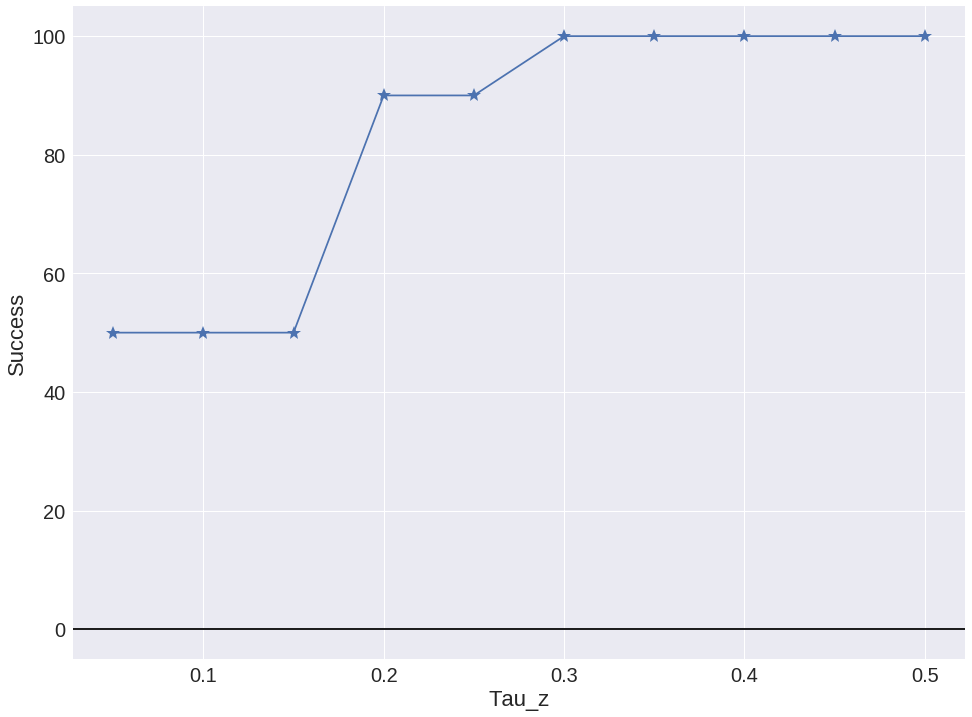

In [136]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(tau_z_vector, total_success_tau_z, '*-', markersize=15)

ax.axhline(0, color='black')
ax.set_ylim([-5, 105])

ax.set_xlabel('Tau_z')
ax.set_ylabel('Success')

ax.legend();

In [112]:
successes

[0.0, 100.0]

#### More

In [116]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50

dt = 0.001

# Recall 
n = 1
T_cue = 0.100
T_recall = 10.0

# Artificial matrix
beta = False
value = 3
inhibition = -1
extension = 4
decay_factor = 0.3
sequence_decay = 0.0
tau_z_pre = 0.150

In [117]:
# Sequence structure
overlap = 5
number_of_sequences = 2
half_width = 4

tau_z_vector = np.arange(0.025, 0.525, 0.025)
overlaps = [2, 3, 4, 5]
total_success_list_tau_z = []
total_success_list_tau_z_var = []

for overlap in overlaps:
    print(overlap)
    total_success_tau_z = np.zeros(tau_z_vector.size)
    total_success_tau_z_var = np.zeros(tau_z_vector.size)
    for tau_z_index, tau_z_pre in enumerate(tau_z_vector):

        # Build chain protocol
        chain_protocol = Protocol()
        units_to_overload = [i for i in range(overlap)]
        sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)

        manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value,
                                            inhibition=inhibition,
                                            extension=extension, decay_factor=decay_factor,
                                            sequence_decay=sequence_decay,
                                            dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True,
                                            beta=beta)

        manager.nn.tau_z_pre = tau_z_pre

        successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, 
                                                       sequences=sequences)
        total_success_tau_z[tau_z_index] = np.min(successes)
        total_success_tau_z_var[tau_z_index] = np.var(successes)
    total_success_list_tau_z.append(total_success_tau_z)

2
3
4
5


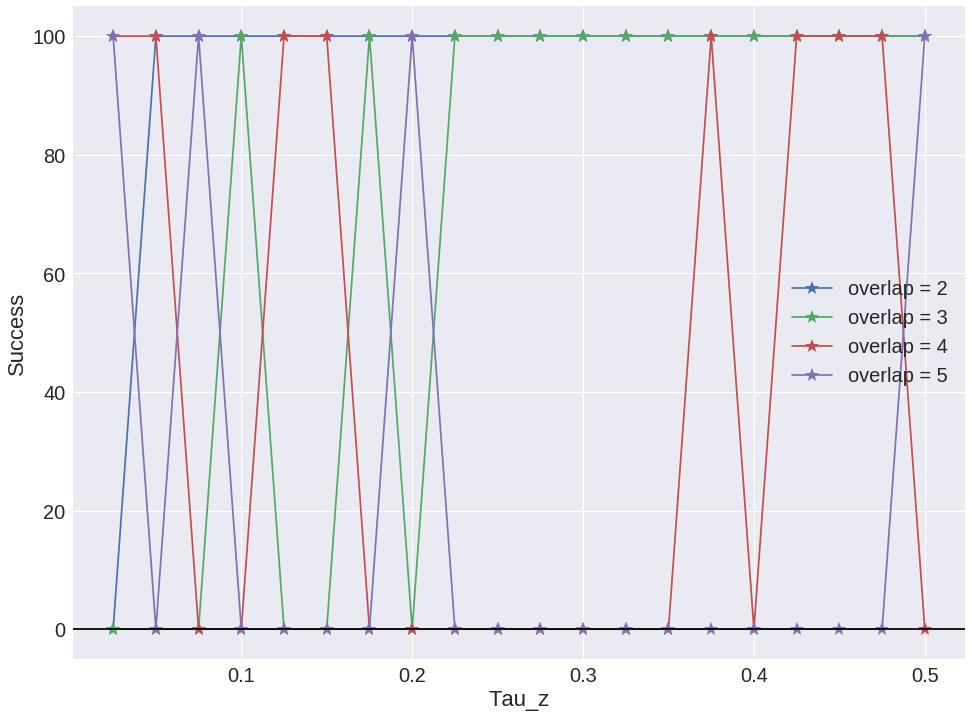

In [118]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
for overlap, total_success_tau_z in zip(overlaps, total_success_list_tau_z):
    ax.plot(tau_z_vector, total_success_tau_z, '*-', markersize=15, label='overlap = ' + str(overlap))

ax.axhline(0, color='black')
ax.set_ylim([-5, 105])

ax.set_xlabel('Tau_z')
ax.set_ylabel('Success')

ax.legend();

### Overload

In [176]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40

dt = 0.001

# Recall 
n = 3
T_cue = 0.100
T_recall = 10.0

# Artificial matrix
beta = False
value = 3
inhibition = -1
extension = 4
decay_factor = 0.3
sequence_decay = 0.0
tau_z_pre = 0.250

# Sequence structure
overlap = 3
number_of_sequences = 2
half_width = 4

# Build chain protocol
chain_protocol = Protocol()
units_to_overload = [i for i in range(overlap)]
sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)

extension_vector = np.arange(1, 6, 1)
total_success_extension = np.zeros(extension_vector.size)

In [177]:
print('sequence')
print(sequences)

sequence
[[3, 4, 5, 6, 0, 1, 2, 7, 8, 9, 10], [11, 12, 13, 14, 0, 1, 2, 15, 16, 17, 18]]


In [178]:
for extension_index, extension in enumerate(extension_vector):
    print('extension', extension)



    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value,
                                        inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor,
                                        sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True,
                                        beta=beta)

    manager.nn.tau_z_pre = tau_z_pre

    successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, 
                                                   sequences=sequences)
    print(successes)
    total_success_extension[extension_index] = np.min(successes)

('extension', 1)
[0.0, 100.0]
('extension', 2)
[66.66666666666667, 33.333333333333336]
('extension', 3)
[66.66666666666667, 66.66666666666667]
('extension', 4)
[66.66666666666667, 100.0]
('extension', 5)
[100.0, 100.0]
('extension', 6)
[100.0, 100.0]


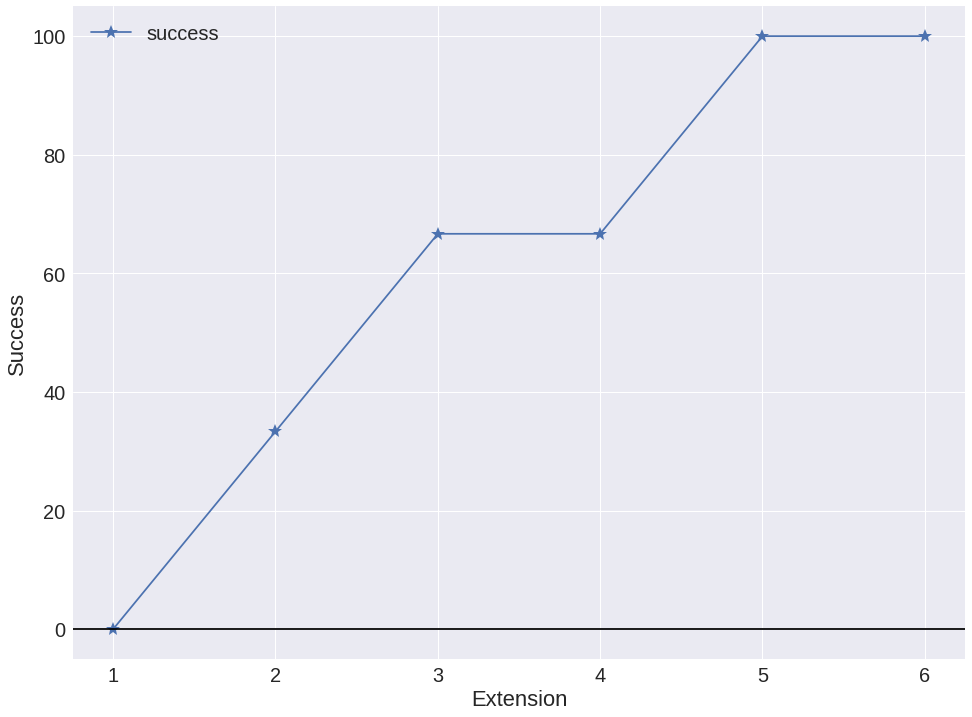

In [179]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(extension_vector, total_success_extension, '*-', markersize=15, label='success')

ax.axhline(0, color='black')
ax.set_ylim([-5, 105])

ax.set_xlabel('Extension')
ax.set_ylabel('Success')

ax.legend();

In [180]:
overlap

3

#### Bigger

In [164]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50

dt = 0.001

# Recall 
n = 1
T_cue = 0.100
T_recall = 10.0

# Artificial matrix
beta = False
value = 3
inhibition = -1
extension = 4
decay_factor = 0.3
sequence_decay = 0.0
tau_z_pre = 0.250

# Sequence structure
overlap = 3
number_of_sequences = 2
half_width = 4
extension_vector = np.arange(1, 6, 1)

In [165]:
total_success_list_extension = []
overlaps = [1, 2, 3]
for overlap in overlaps:
    total_success_extension = np.zeros(extension_vector.size)
    print('overlap', overlap)
    for extension_index, extension in enumerate(extension_vector):
        
        # Build chain protocol
        chain_protocol = Protocol()
        units_to_overload = [i for i in range(overlap)]
        sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)

        manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value,
                                            inhibition=inhibition,
                                            extension=extension, decay_factor=decay_factor,
                                            sequence_decay=sequence_decay,
                                            dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True,
                                            beta=beta)

        manager.nn.tau_z_pre = tau_z_pre

        successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, 
                                                       sequences=sequences)
        total_success_extension[extension_index] = np.min(successes)
    total_success_list_extension.append(total_success_extension)

('overlap', 1)
('overlap', 2)
('overlap', 3)


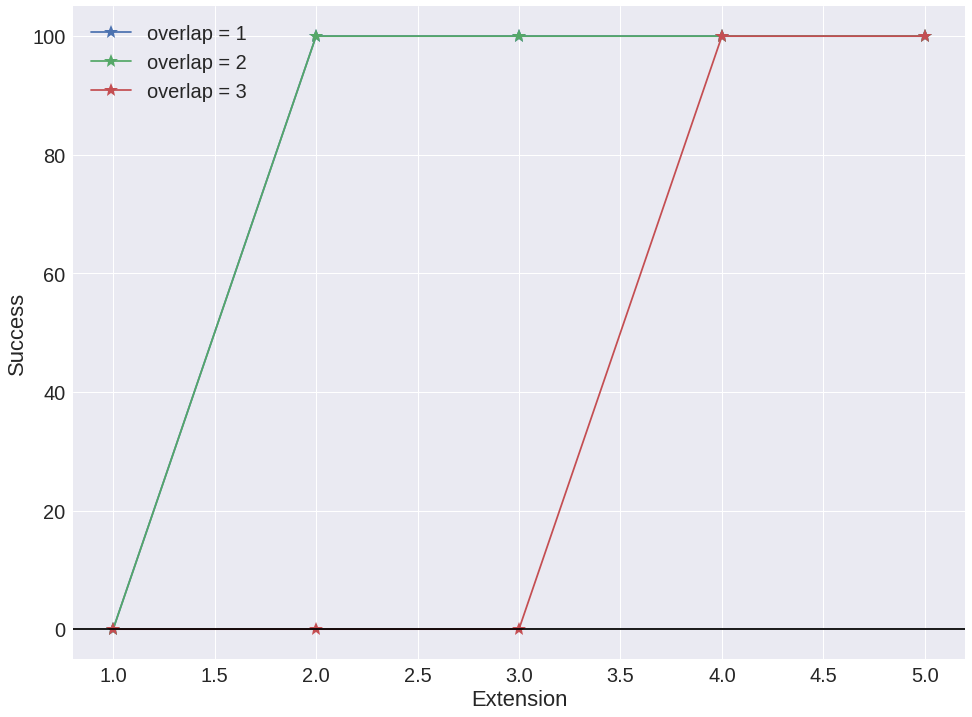

In [166]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
for overlap, total_success_extension in zip(overlaps, total_success_list_extension):
    ax.plot(extension_vector, total_success_extension, '*-', markersize=15, label='overlap = ' + str(overlap))

ax.axhline(0, color='black')
ax.set_ylim([-5, 105])

ax.set_xlabel('Extension')
ax.set_ylabel('Success')

ax.legend();

## E / I ratio

## Overload

In [16]:
# Patterns parameters
hypercolumns = 4
minicolumns = 60

dt = 0.001

# Recall 
n = 3
T_cue = 0.100
T_recall = 10.0

# Artificial matrix
beta = False
value = 3
inhibition = -1
extension = 4
decay_factor = 0.3
sequence_decay = 0.0
tau_z_pre = 0.150

In [17]:
# Sequence structure
overlap = 2
number_of_sequences = 2
half_width = 4

tau_z_vector = np.arange(0.025, 0.525, 0.025)
overloads = [2, 4, 8]
total_success_list_tau_z = []
total_success_list_tau_z_var = []

for number_of_sequences in overloads:
    print(number_of_sequences)
    total_success_tau_z = np.zeros(tau_z_vector.size)
    total_success_tau_z_var = np.zeros(tau_z_vector.size)
    for tau_z_index, tau_z_pre in enumerate(tau_z_vector):

        # Build chain protocol
        chain_protocol = Protocol()
        units_to_overload = [i for i in range(overlap)]
        sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)

        manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value,
                                            inhibition=inhibition,
                                            extension=extension, decay_factor=decay_factor,
                                            sequence_decay=sequence_decay,
                                            dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True,
                                            beta=beta)

        manager.nn.tau_z_pre = tau_z_pre

        successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, 
                                                       sequences=sequences)
        total_success_tau_z[tau_z_index] = np.min(successes)
        total_success_tau_z_var[tau_z_index] = np.var(successes)
    total_success_list_tau_z.append(total_success_tau_z)

2
4
8


IndexError: index 50 is out of bounds for axis 0 with size 50

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
for overload, total_success_tau_z in zip(overloads, total_success_list_tau_z):
    ax.plot(tau_z_vector, total_success_tau_z, '*-', markersize=15, label='overload = ' + str(overload))

ax.axhline(0, color='black')
ax.set_ylim([-5, 115])

ax.set_xlabel('Tau_z')
ax.set_ylabel('Success')

ax.legend();

#### Extension

In [10]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50

dt = 0.001

# Recall 
n = 1
T_cue = 0.100
T_recall = 10.0

# Artificial matrix
beta = False
value = 3
inhibition = -1
extension = 4
decay_factor = 0.3
sequence_decay = 0.0
tau_z_pre = 0.150

# Sequence structure
overlap = 2
number_of_sequences = 2
half_width = 3
extension_vector = np.arange(1, 7, 1)

In [11]:
total_success_list_extension = []
overloads = [2, 4, 8]
for number_of_sequences in overloads:
    total_success_extension = np.zeros(extension_vector.size)
    print('overloads', number_of_sequences)
    for extension_index, extension in enumerate(extension_vector):
        
        # Build chain protocol
        chain_protocol = Protocol()
        units_to_overload = [i for i in range(overlap)]
        sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)

        manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value,
                                            inhibition=inhibition,
                                            extension=extension, decay_factor=decay_factor,
                                            sequence_decay=sequence_decay,
                                            dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True,
                                            beta=beta)

        manager.nn.tau_z_pre = tau_z_pre

        successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, 
                                                       sequences=sequences)
        total_success_extension[extension_index] = np.min(successes)
    total_success_list_extension.append(total_success_extension)

('overloads', 2)
('overloads', 4)
('overloads', 8)


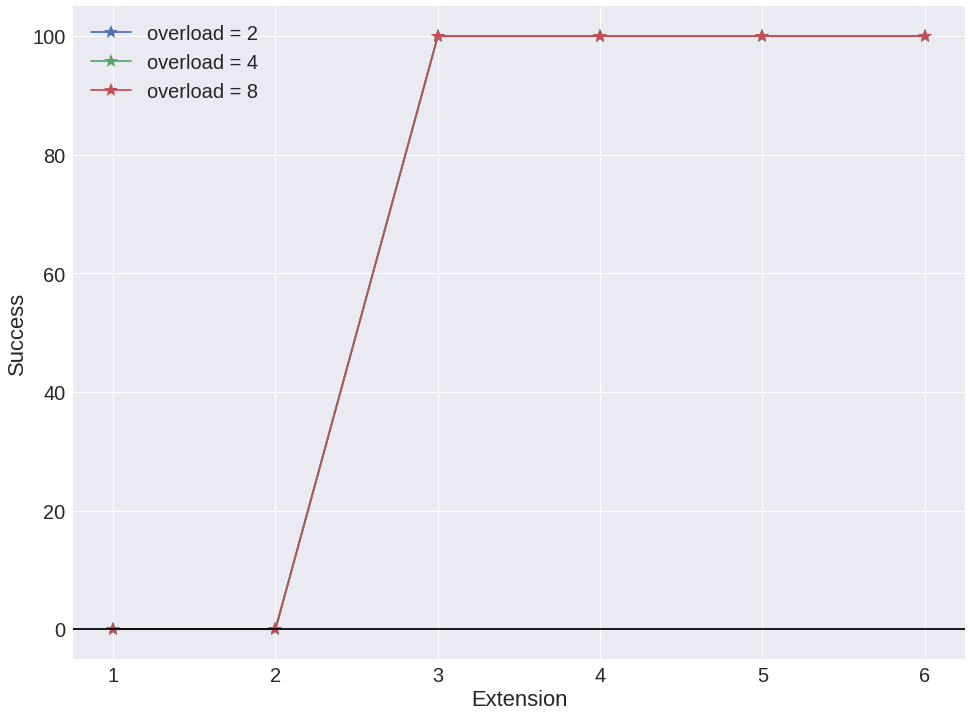

In [12]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
for overload, total_success_extension in zip(overloads, total_success_list_extension):
    ax.plot(extension_vector, total_success_extension, '*-', markersize=15, label='overload = ' + str(overload))

ax.axhline(0, color='black')
ax.set_ylim([-5, 105])

ax.set_xlabel('Extension')
ax.set_ylabel('Success')

ax.legend();

In [13]:
total_success_list_extension

[array([   0.,    0.,  100.,  100.,  100.,  100.]),
 array([   0.,    0.,  100.,  100.,  100.,  100.]),
 array([   0.,    0.,  100.,  100.,  100.,  100.])]

[[2, 3, 4, 0, 1, 5, 6, 7],
 [8, 9, 10, 0, 1, 11, 12, 13],
 [14, 15, 16, 0, 1, 17, 18, 19],
 [20, 21, 22, 0, 1, 23, 24, 25],
 [26, 27, 28, 0, 1, 29, 30, 31],
 [32, 33, 34, 0, 1, 35, 36, 37],
 [38, 39, 40, 0, 1, 41, 42, 43],
 [44, 45, 46, 0, 1, 47, 48, 49]]

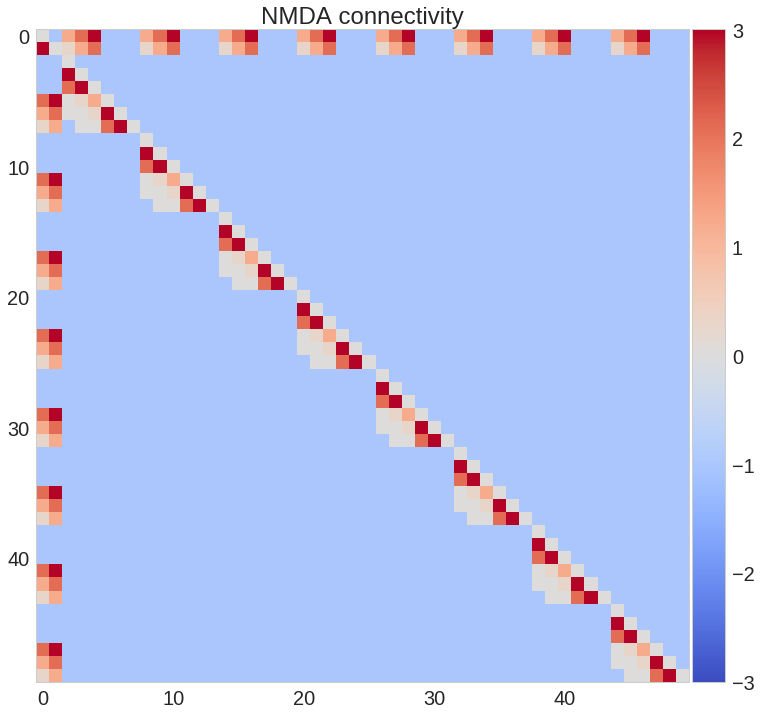

In [14]:
plot_weight_matrix(manager.nn)
sequences

## Examples with real training

#### tau_z

In [80]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50
n_patterns = 10

dt = 0.001

# Manager properties
dt = 0.001
T_recall = 5.0
T_cue = 0.100
n = 1
values_to_save = ['o']

# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Sequence structure
overlap = 3
number_of_sequences = 3
half_width = 2

tau_z_vector = np.arange(0.050, 0.550, 0.050)

In [81]:
chain_protocol = Protocol()
units_to_overload = [i for i in range(overlap)]
sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)
print(sequences)

[[3, 4, 0, 1, 2, 5, 6], [7, 8, 0, 1, 2, 9, 10], [11, 12, 0, 1, 2, 13, 14]]


In [82]:
total_success_tau_z = np.zeros(tau_z_vector.size)
total_success_tau_z_var = np.zeros(tau_z_vector.size)
total_success_tau_z_min = np.zeros(tau_z_vector.size)

for tau_z_index, tau_z_pre in enumerate(tau_z_vector):
    print('index', tau_z_index, tau_z_pre)    
    # Build the network
    nn = BCPNNFast(hypercolumns, minicolumns, tau_z_pre=tau_z_pre)
    # Buidl the manager
    manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)
        
    # Build chain protocol
    chain_protocol = Protocol()
    units_to_overload = [i for i in range(overlap)]
    sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)
    chain_protocol.cross_protocol(sequences, training_time=training_time,
                            inter_sequence_interval=inter_sequence_interval, epochs=epochs)
    
    # Run the manager
    manager.run_network_protocol(protocol=chain_protocol, verbose=False)       
    
    successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, 
                                                   sequences=sequences)
    # Store
    total_success_tau_z[tau_z_index] = np.mean(successes)
    total_success_tau_z_min[tau_z_index] = np.min(successes)
    total_success_tau_z_var[tau_z_index] = np.std(successes)

('index', 0, 0.050000000000000003)
('index', 1, 0.10000000000000001)
('index', 2, 0.15000000000000002)
('index', 3, 0.20000000000000001)
('index', 4, 0.25)
('index', 5, 0.29999999999999999)
('index', 6, 0.35000000000000003)
('index', 7, 0.40000000000000002)
('index', 8, 0.45000000000000001)
('index', 9, 0.5)


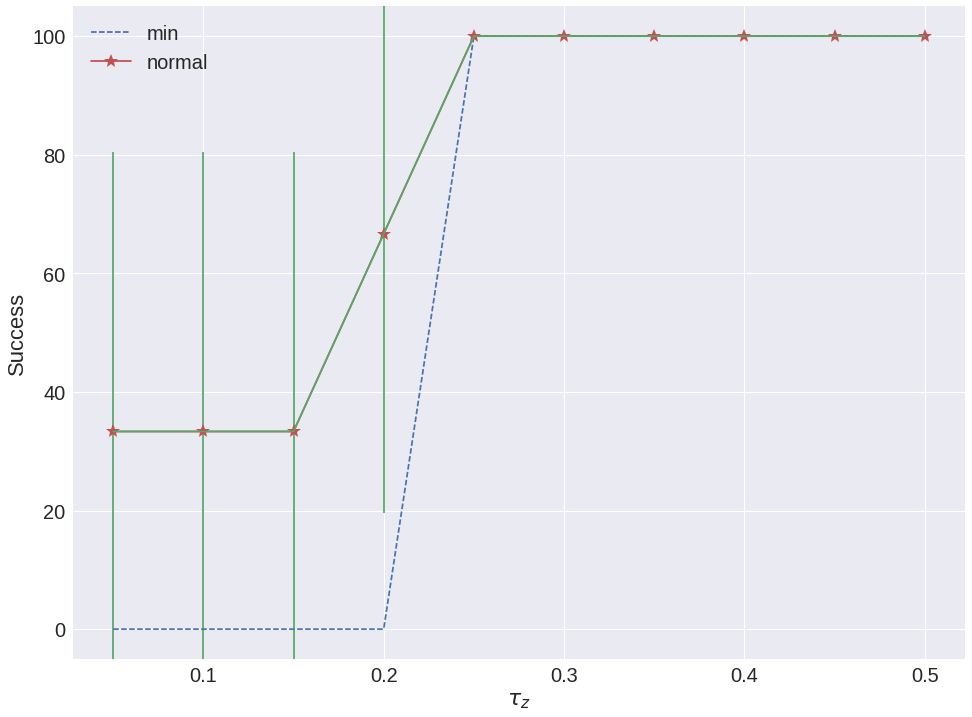

In [83]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(tau_z_vector, total_success_tau_z_min, '--', markersize=15, label='min')
ax.errorbar(tau_z_vector, total_success_tau_z, yerr=total_success_tau_z_var)
ax.plot(tau_z_vector, total_success_tau_z, '*-', markersize=15, label='normal')

# ax.axhline(0, color='black', alpha=0.1)
ax.set_ylim([-5, 105])

ax.set_xlabel(r'$\tau_z$')
ax.set_ylabel('Success')

ax.legend();

#### More

In [ ]:
# Patterns parameters
hypercolumns = 4
minicolumns = 30
n_patterns = 10

dt = 0.001

# Manager properties
dt = 0.001
T_recall = 5.0
T_cue = 0.100
n = 1
values_to_save = ['o']

# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

sigma = 0

In [ ]:
# Sequence structure
number_of_sequences = 2
half_width = 2

tau_z_vector = np.arange(0.025, 0.525, 0.025)
overlaps = [2, 3, 4]
total_success_list_tau_z = []
total_success_list_tau_z_var = []
total_success_list_tau_z_min = []

for overlap in overlaps:
    print(overlap)
    total_success_tau_z = np.zeros(tau_z_vector.size)
    total_success_tau_z_var = np.zeros(tau_z_vector.size)
    total_success_tau_z_min = np.zeros(tau_z_vector.size)
    for tau_z_index, tau_z_pre in enumerate(tau_z_vector):
        # Build the network
        nn = BCPNNFast(hypercolumns, minicolumns, tau_z_pre=tau_z_pre, sigma=0)
        # Buidl the manager
        manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

        # Build chain protocol
        chain_protocol = Protocol()
        units_to_overload = [i for i in range(overlap)]
        sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)
        chain_protocol.cross_protocol(sequences, training_time=training_time,
                                inter_sequence_interval=inter_sequence_interval, epochs=epochs)

        # Run the manager
        manager.run_network_protocol(protocol=chain_protocol, verbose=False)       

        successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, 
                                                       sequences=sequences)
        # Store
        total_success_tau_z[tau_z_index] = np.mean(successes)
        total_success_tau_z_min[tau_z_index] = np.min(successes)
        total_success_tau_z_var[tau_z_index] = np.var(successes)
    
    total_success_list_tau_z.append(total_success_tau_z)
    total_success_list_tau_z_var.append(total_success_tau_z_var)
    total_success_list_tau_z_min.append(total_success_tau_z_min)

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
color_list = color_list[:len(overlaps)]

for overlap, total_success_tau_z, color in zip(overlaps, total_success_list_tau_z, color_list):
    ax.plot(tau_z_vector, total_success_tau_z, '*-', markersize=15, color=color,
            label='overlap = ' + str(overlap))

for overlap, total_success_tau_z, color in zip(overlaps, total_success_list_tau_z_min, color_list):
    ax.plot(tau_z_vector, total_success_tau_z, markersize=15, color=color, linestyle='--')  
    
ax.axhline(0, color='black')
ax.set_ylim([-5, 105])

ax.set_xlabel(r'$\tau_z$  NMDA')
ax.set_ylabel('Success')

ax.legend();

#### Overload

In [95]:
# Patterns parameters
hypercolumns = 4
minicolumns = 40
n_patterns = 10

dt = 0.001

# Manager properties
dt = 0.001
T_recall = 5.0
T_cue = 0.100
n = 1
values_to_save = ['o']

# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

sigma = 0

In [ ]:
# Sequence structure
overlap = 2
number_of_sequences = 2
half_width = 2

tau_z_vector = np.arange(0.025, 0.525, 0.025)
overloads = [5, 4, 3, 2]
total_success_list_tau_z = []
total_success_list_tau_z_var = []
total_success_list_tau_z_min = []

for number_of_sequences in overloads:
    print(number_of_sequences)
    total_success_tau_z = np.zeros(tau_z_vector.size)
    total_success_tau_z_var = np.zeros(tau_z_vector.size)
    total_success_tau_z_min = np.zeros(tau_z_vector.size)
    for tau_z_index, tau_z_pre in enumerate(tau_z_vector):
        # Build the network
        nn = BCPNNFast(hypercolumns, minicolumns, tau_z_pre=tau_z_pre, sigma=sigma)
        # Buidl the manager
        manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

        # Build chain protocol
        chain_protocol = Protocol()
        units_to_overload = [i for i in range(overlap)]
        sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)
        chain_protocol.cross_protocol(sequences, training_time=training_time,
                                inter_sequence_interval=inter_sequence_interval, epochs=epochs)

        # Run the manager
        manager.run_network_protocol(protocol=chain_protocol, verbose=False)       

        successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, 
                                                       sequences=sequences)
        # Store
        total_success_tau_z[tau_z_index] = np.mean(successes)
        total_success_tau_z_min[tau_z_index] = np.min(successes)
        total_success_tau_z_var[tau_z_index] = np.var(successes)
    
    total_success_list_tau_z.append(total_success_tau_z)
    total_success_list_tau_z_var.append(total_success_tau_z_var)
    total_success_list_tau_z_min.append(total_success_tau_z_min)

5


In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
color_list = color_list[:len(overloads)]

for overload, total_success_tau_z, color in zip(overloads, total_success_list_tau_z, color_list):
    ax.plot(tau_z_vector, total_success_tau_z, '*-', markersize=15, color=color,
            label='overload = ' + str(overload))

for overlap, total_success_tau_z, color in zip(overloads, total_success_list_tau_z_min, color_list):
    ax.plot(tau_z_vector, total_success_tau_z, markersize=15, color=color, linestyle='--')  
    
ax.axhline(0, color='black')
ax.set_ylim([-5, 105])

ax.set_xlabel(r'$\tau_z$  NMDA')
ax.set_ylabel('Success')

ax.legend();

#### Git machinery

In [15]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])